<a href="https://colab.research.google.com/github/Lileshwar26/Assessment-2-/blob/main/Copy_of_download_enron_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enron Email Analysis
  Amatah Lileshwar
  20806288 
  ---
  28/05/2023

### **Introduction**

Inaugurated in 1985, the most dominant pioneer in America after its merger, The Enron Corporation now transformed into the most deceitful company. It was involved in unlawful financial activities. In 2001, the illegal activities of the company were disclosed. The Enron scandal had a domino effect consisting of loss of trust to the investors, hardening of laws and it left an indelible mark on public perception of corporate governance. 
Through this assessment, a small analysis will be performed to project the communication pattern of the company in terms of table, bar chart and pie chart.

In [ ]:
# Here is the link provided to obtain the data.
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-27 17:18:41--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-27 17:18:43--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  46.9MB/s    in 23s     

2023-05-27 17:19:06 (36.

Imports

In [ ]:
# Here I have imported the library sqlite3 with which I will use to manipulate the data
import sqlite3
import pandas as pd

Connection 

In [ ]:
# Setting up connection to sqlite3 library to interact with the database
conn = sqlite3.connect("enron.db")

In [ ]:
# Creation of cursor object which will be served as a control structure or handle to interact with the data base
cur = conn.cursor()

In [ ]:
# I used the following to check schema of database 
# It will give details of the content that is present in the database
sql="""
SELECT name
FROM sqlite_master
WHERE type= 'table';
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
# Check schema of table for employeelist by PRAGMA
# This will give details of the elements present in 'employeelist' 
sql = """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()
        

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
# Check schema of table of message by PRAGMA
# This will give details of the content of 'message'
sql="""
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
# Check schema of table recipientinfo by PRAGMA
# This should extract details about 'recipientinfo' 
sql="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
# Check Schema of table referenceinfo using PRAGMA
# This sql query will show contents available in 'referenceinfo'
sql="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

Data extraction and manipulation:

In [ ]:
# load the data into the a Dataframe
# These sql will give data present on the dataframe
sql = '''
SELECT * from employeelist;
'''
employeelist_df = pd.read_sql_query(sql, conn)
employeelist_df 

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [ ]:
# Load the data into a Dataframe 
# This code will fetch all details available from 'message' table and give the opportunity for further analysis with the help of pandas 
sql = '''
SELECT * from message; 
'''
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
# load the data into the a Dataframe
# With this code, with the help of pandas, various data will be available for manipulation
sql = '''
SELECT * from recipientinfo;
'''
recipientinfo_df = pd.read_sql_query(sql, conn)
recipientinfo_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [ ]:
# load the data into the a Dataframe
sql = ''' 
SELECT * from referenceinfo;
'''
referenceinfo_df = pd.read_sql_query(sql, conn)
referenceinfo_df

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
...,...,...,...
54773,63020,404873,From: \tEnron Announcements/Corp/Enron@ENRON ...
54774,63021,404888,"From: \tBlair, Kit Sent:\tWednesday, November..."
54775,63022,404907,"From: \tDean, Craig Sent:\tThursday, January ..."
54776,63023,404918,"From: \tDean, Craig Sent:\tTuesday, February ..."


In [ ]:
#convert into dataframe 
message_df = pd.read_sql_query(sql, conn)
message_df.info

<bound method DataFrame.info of               date  count
0       0001-05-30      2
1       0001-06-18      1
2       0001-07-24      1
3       0001-08-01      1
4       0001-08-06      1
...            ...    ...
194082  2020-12-29      1
194083  2043-12-28      1
194084  2044-01-02      1
194085  2044-01-04      1
194086  2044-01-04      1

[194087 rows x 2 columns]>

## Email Traffic Overtime

Further imports 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check  whether there is null values or not in the database
sql = """
SELECT date
FROM Message
"""

In [ ]:
# Convert data into dataframe
# The following will provide information of number of message sent per day
sql = '''
SELECT strftime('%Y-%m-%d', date)
AS date, 
COUNT (*) AS count FROM message
GROUP BY date
'''
messageperday_df = pd.read_sql_query(sql, conn)
messageperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


Text(0.5, 1.0, 'Message per day')

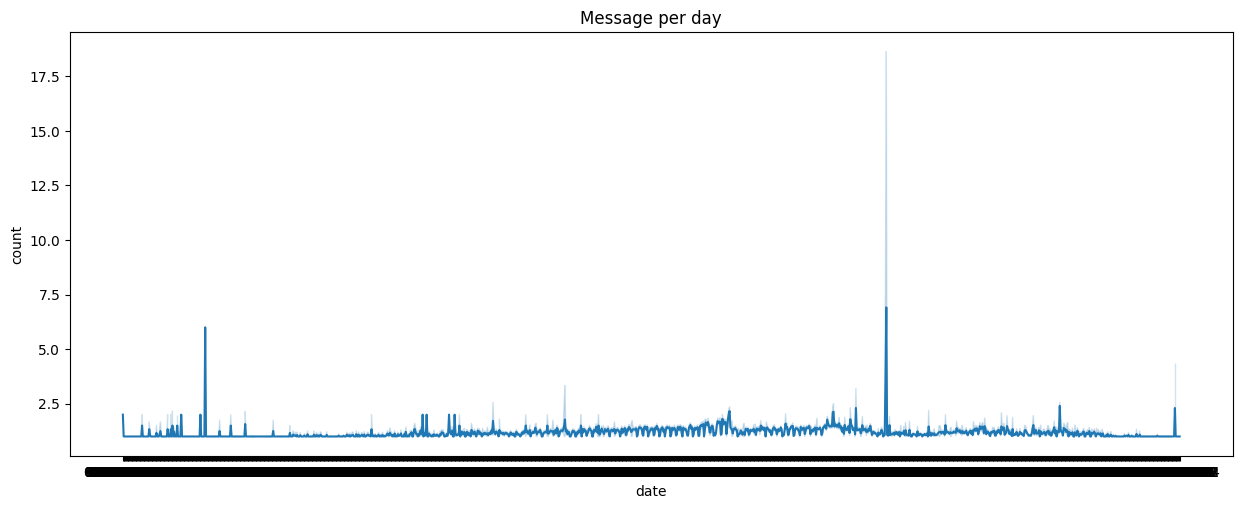

In [ ]:
# With the help of this code, it will plot a graph to show the number of message per day
fig = plt.subplots(figsize=(15,5.5))
sns.lineplot(x = 'date', y='count', data = messageperday_df)
plt.title('Message per day')

In [ ]:
# load the data into the a Dataframe
# The code will provide results for message sent per week
sql = '''
SELECT * from recipientinfo;
'''
recipientinfo_df = pd.read_sql_query(sql, conn)
recipientinfo_df
sql = '''
SELECT strftime('%Y-%w', date)
AS date, 
COUNT (*) AS count FROM message
GROUP BY date
'''
messageperweek_df = pd.read_sql_query(sql, conn)
messageperweek_df

,date,count
0,0001-3,2
1,0001-1,1
2,0001-2,1
3,0001-3,1
4,0001-1,1
...,...,...
194082,2020-2,1
194083,2043-1,1
194084,2044-6,1
194085,2044-1,1


Text(0.5, 1.0, 'Message per week')

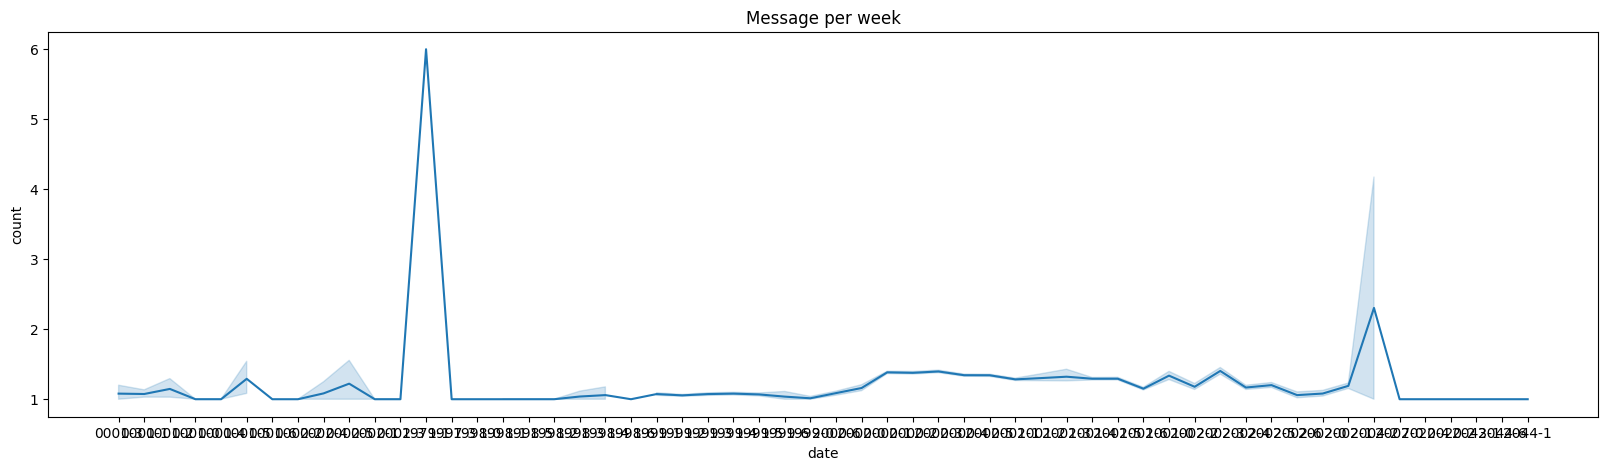

In [ ]:
# This sql code will generate a graph for message sent per week 
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y='count', data = messageperweek_df)
plt.title('Message per week')

In [ ]:
# convert data into dataframe 
# This sql query will provide data from the database for message sent per month
sql = '''
SELECT strftime('%Y-%m', date)
AS date, 
COUNT (*) AS count FROM message
GROUP BY date
'''
cur.execute(sql)
messagepermonth_df = pd.read_sql_query(sql, conn)
messagepermonth_df

,date,count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


Text(0.5, 1.0, 'Message per month')

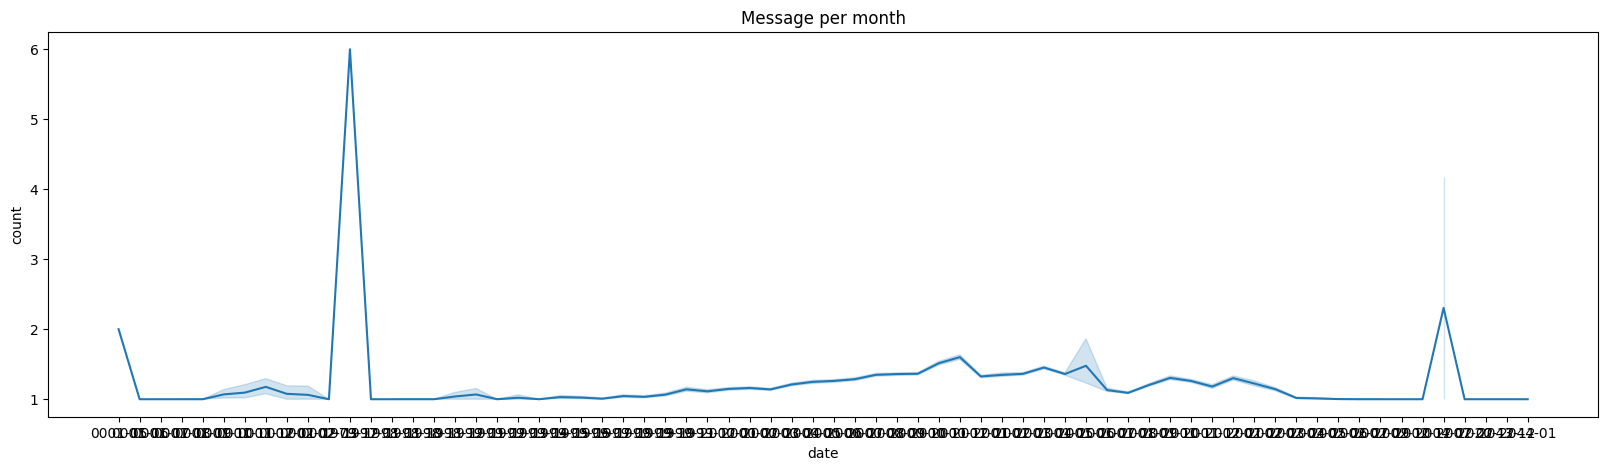

In [ ]:
# The following code will plot a graph for message per month
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y='count', data = messagepermonth_df)
plt.title('Message per month')

TOP SENDERS AND RECIPIENTS

In [ ]:
#sql query to count the number of emails by each sender
sql_sender ='''
SELECT sender, COUNT (*) AS count
FROM message 
GROUP BY sender 
ORDER BY count
DESC
LIMIT 15 
'''

In [ ]:
#convert into dataframe
# this code will provide information about the top senders
sender_df = pd.read_sql_query(sql_sender, conn)
sender_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


<Axes: xlabel='count', ylabel='sender'>

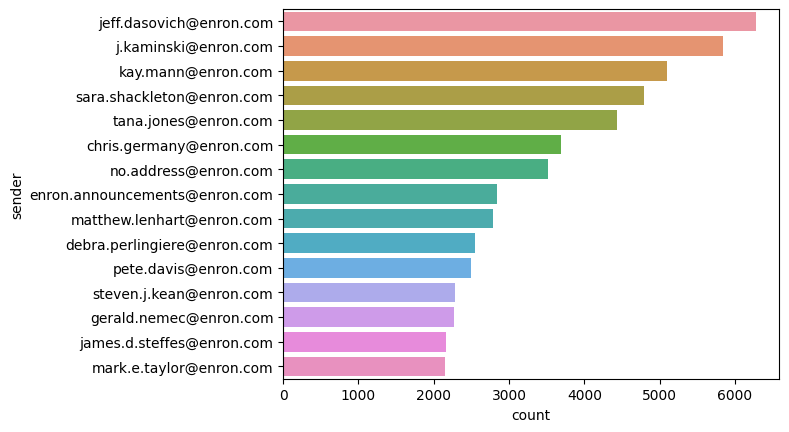

In [ ]:
#plot the dataframe using bar plot
# this diagram shows the sender who has sent the highest number of emails
sns.barplot(x = 'count', y = 'sender', data = sender_df)

In [ ]:
#SQL query to retrieve the count of emails for each recipient.
sql_recipient ='''
SELECT rvalue as recipient, COUNT (*) AS count
FROM recipientinfo
GROUP BY recipient
ORDER BY count
DESC
LIMIT 15 
'''

In [ ]:
# convert data into dataframe 
# The result which will be generated from this sql code will show the recipient who has received the highest number of emails 
recipient_df = pd.read_sql_query(sql_recipient, conn)
recipient_df

,recipient,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


<Axes: xlabel='count', ylabel='recipient'>

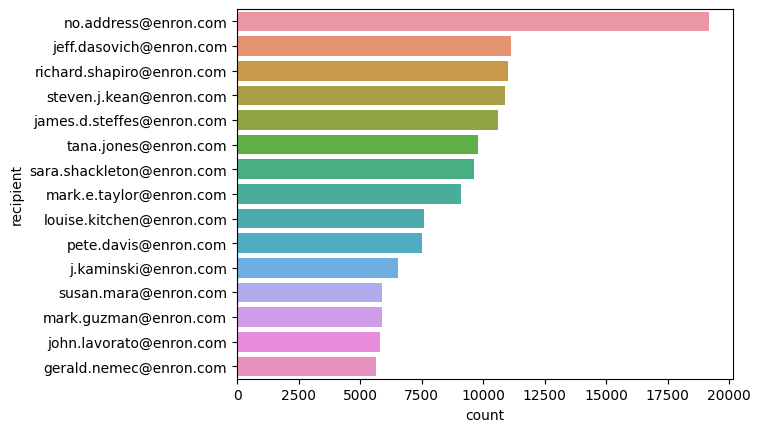

In [ ]:
#plot the dataframe using bar plot
# diagram dislaying recipient with highest number of emails
sns.barplot(x = 'count', y = 'recipient', data = recipient_df)

EMAIL DISTRIBUTION by Recipient Type 

In [ ]:
#sql to categorize by rtype using count 
sql_rtype ='''
SELECT rtype as rtype, COUNT (*) AS count
FROM recipientinfo
GROUP BY rtype
ORDER BY count
'''

In [ ]:
#convert data into dataframe 
rtype_df = pd.read_sql_query(sql_rtype, conn)
rtype_df

,rtype,count
0,BCC,253713
1,CC,253735
2,TO,1556994


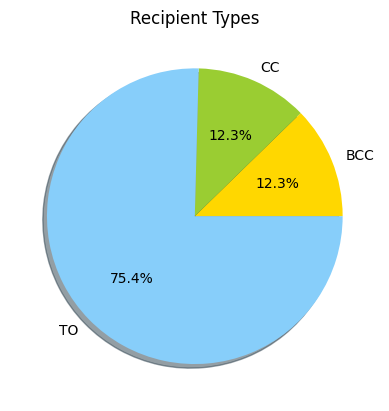

In [ ]:
# This code will generate a pie chart for the type of message of the recipients
# To generate this pie chart, i have made use of this link: https://pythonspot.com/matplotlib-pie-chart/
labels = rtype_df['rtype']
values = rtype_df['count']
colors = ['gold', 'yellowgreen', 'lightskyblue']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Recipient Types')
plt.show()

## **Conclusion**

To conclude, the tables, graphs including bar charts and pie chart gave a better perspective of the data present in the database. Through the results, inquiry officers can go in deeper research to get an overview how the Enron Corporation have become so fradulent. 
